<a href="https://colab.research.google.com/github/king-gun1116/-_-/blob/main/Quant'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 퀀트 머신 라이브러리 finterstellar
pip install finterstellar

In [ ]:
# finterstellar를 fs로 정의
import finterstellar as fs

In [ ]:
# 애플의 주가를 받아오기
df = fs.get_price('AAPL', start_date='2020-01-01', end_date='2020-12-31')
print(df)

             AAPL
2020-01-02  72.72
2020-01-03  72.01
2020-01-06  72.58
2020-01-07  72.24
2020-01-08  73.40
...           ...
2020-12-24 128.91
2020-12-28 133.52
2020-12-29 131.74
2020-12-30 130.62
2020-12-31 129.61

[253 rows x 1 columns]


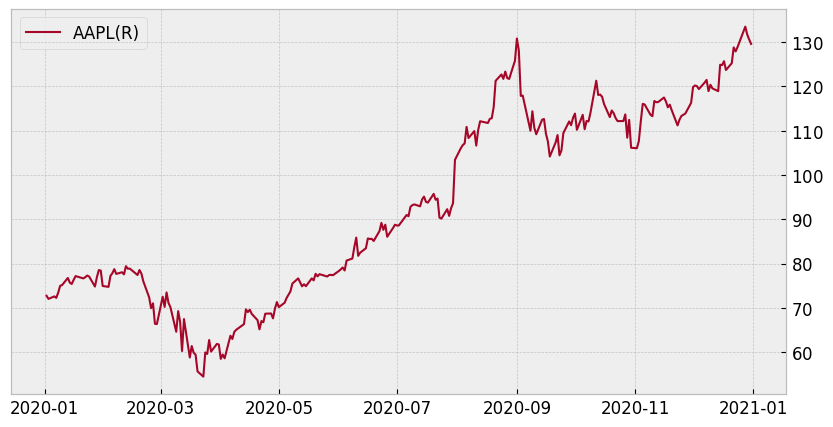

In [ ]:
# 애플 주가 데이터프레임의 데이터를 차트로 그리기
fs.draw_chart(df, right='AAPL')

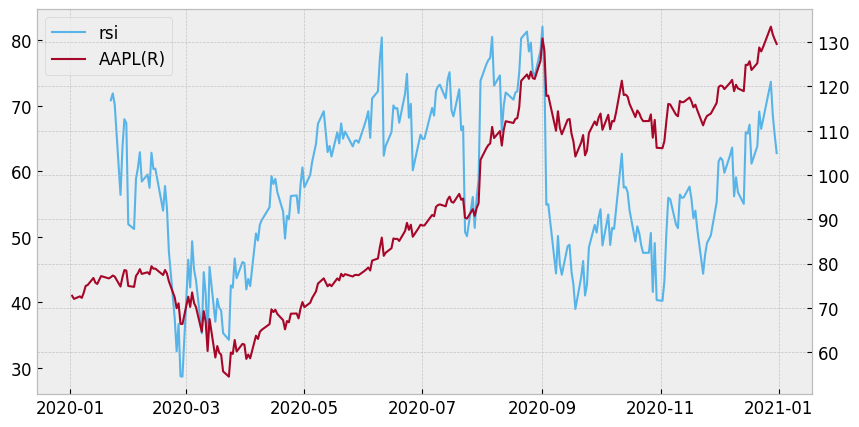

In [ ]:
# 애플 주가의 RSI(상대강도지수)값 산출
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right='AAPL')

In [ ]:
# RSI 값을 기준으로 투자 판단 (RSI가 40이하일 경우 매수, 60이상일 경우 매도)
fs.indicator_to_signal(df, factor='rsi', buy=40, sell=60)

,trade
2020-01-02,zero
2020-01-03,zero
2020-01-06,zero
2020-01-07,zero
2020-01-08,zero
...,...
2020-12-24,zero
2020-12-28,zero
2020-12-29,zero
2020-12-30,zero


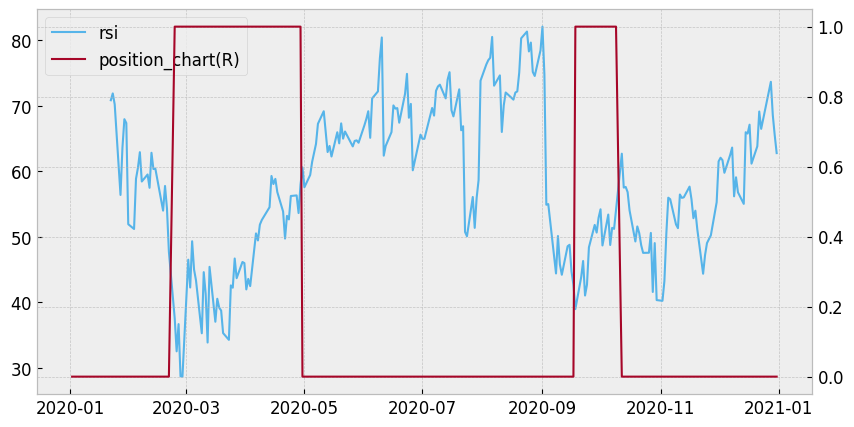

In [ ]:
# 트레이딩 시그널 데이터에 따른 포지션(주식 보유 현황)산출
fs.position(df)
fs.draw_chart(df, left='rsi', right='position_chart')

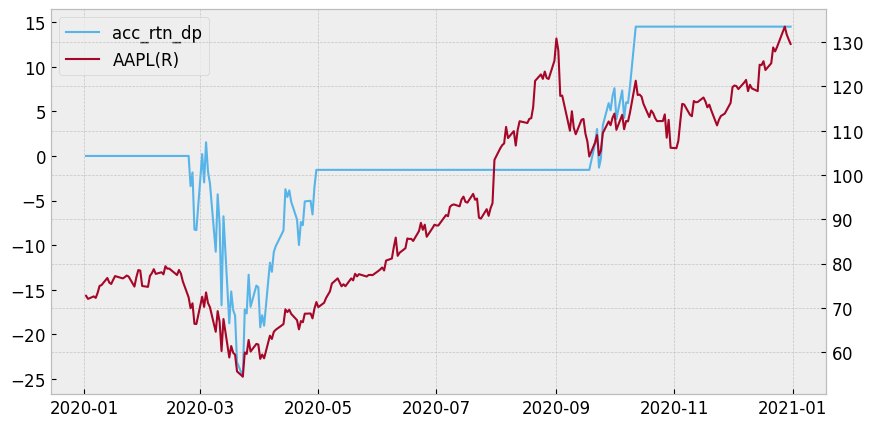

In [ ]:
# 포지션 데이터의 수익률 산출
fs.evaluate(df, cost=.001)
fs.draw_chart(df, left='acc_rtn_dp', right='AAPL')

In [ ]:
# 투자 성과 분석 ( 샤프비율 -> 무위험이자율은 1%로 설정)
fs.performance(df, rf_rate=0.01)

CAGR: 15.39%
Accumulated return: 14.50%
Average return: 7.38%
Benchmark return : 68.50%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.33
MDD: -25.89%
Benchmark MDD: -31.42%


CAGR: 48.67%
Accumulated return: 45.87%
Average return: 45.97%
Benchmark return : 68.50%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 1.29
MDD: -30.45%
Benchmark MDD: -31.42%


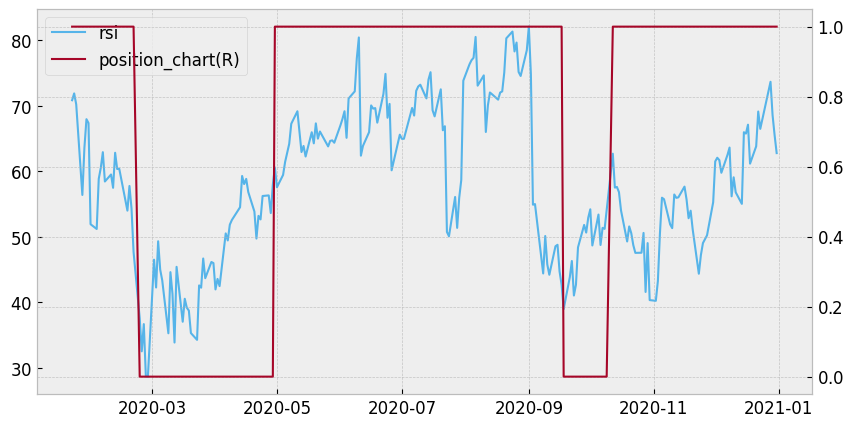

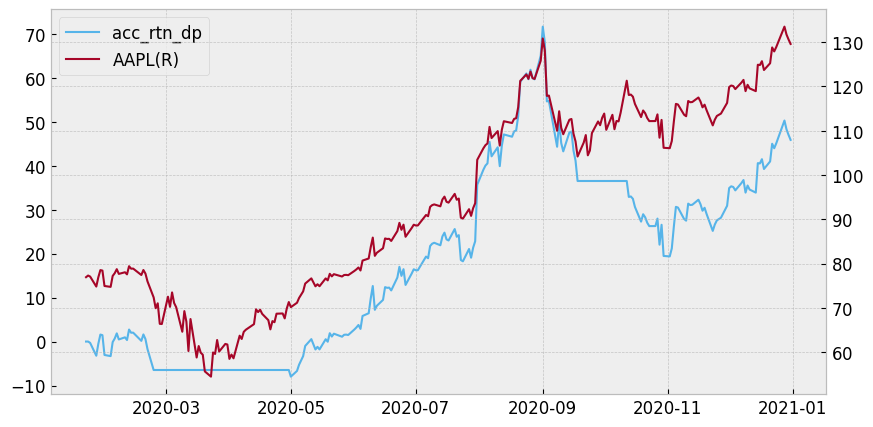

In [ ]:
# 투자 성과분석 -> RSI 60에 매수하고, 40에 매도
fs.indicator_to_signal(df, factor='rsi', buy=60, sell=40)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_chart(df, left='rsi', right='position_chart')
fs.draw_chart(df, left='acc_rtn_dp', right='AAPL')

In [ ]:
pip install finterstellar

In [ ]:
import finterstellar as fs

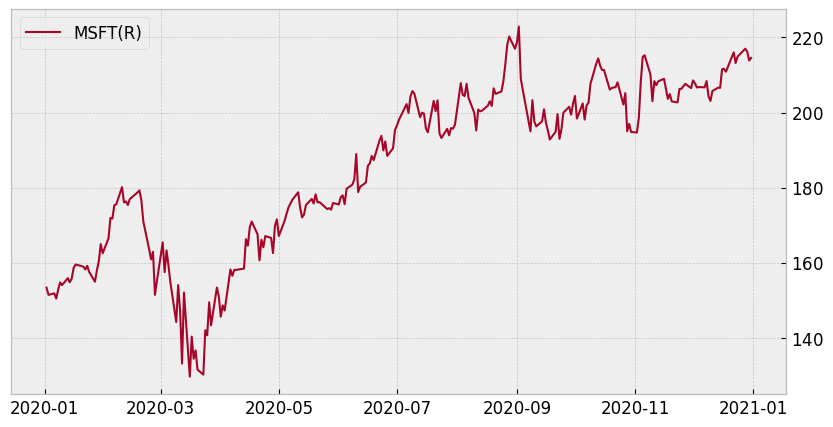

In [ ]:
# MACD(이동평균수렴확산지수)로 트레이딩 : 마이크로소프트의 주가 가져오기
symbol = 'MSFT'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df,right=symbol)

In [ ]:
# MACD(이동평균수렴확산지수)함수 : 단기(12), 장기(26), 시그널(9)
fs.macd(df)

,MSFT,macd,macd_signal,macd_oscillator
2020-01-02,153.32,0.00,0.00,0.00
2020-01-03,151.41,-0.04,-0.02,-0.02
2020-01-06,151.81,-0.04,-0.03,-0.01
2020-01-07,150.42,-0.09,-0.05,-0.04
2020-01-08,152.82,-0.02,-0.04,0.02
...,...,...,...,...
2020-12-24,214.88,2.23,1.41,0.82
2020-12-28,217.02,2.52,1.63,0.89
2020-12-29,216.23,2.65,1.84,0.81
2020-12-30,213.85,2.54,1.98,0.56


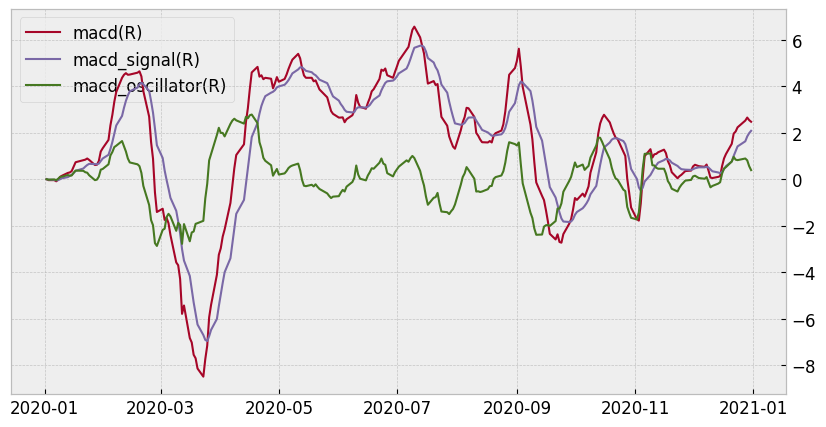

In [ ]:
# MACD(이동평균수렴확산지수) 시각화
fs.draw_chart(df, right=['macd', 'macd_signal', 'macd_oscillator'])

In [ ]:
# MACD Oscillator값에 따른 트레이딩 시그널 생성 (0이상인 경우 매수)
fs.indicator_to_signal(df, factor='macd_oscillator', buy=0, sell=0)

,trade
2020-01-02,zero
2020-01-03,zero
2020-01-06,zero
2020-01-07,zero
2020-01-08,buy
...,...
2020-12-24,buy
2020-12-28,buy
2020-12-29,buy
2020-12-30,buy


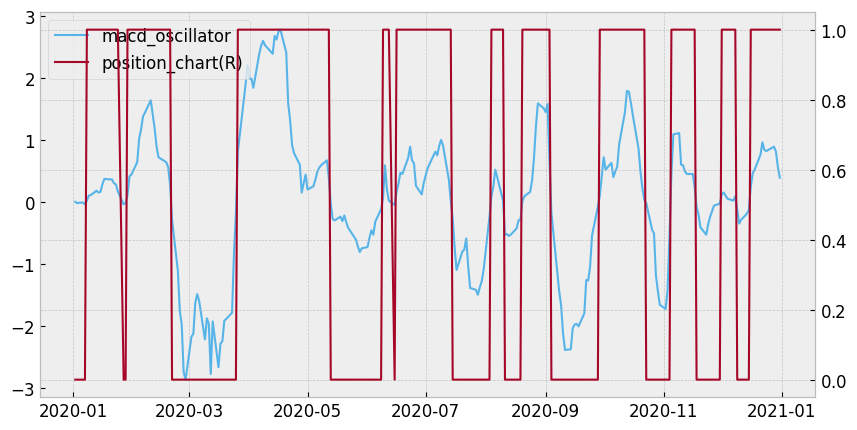

In [ ]:
# 위의 트레이딩 시그널에 따른 주식 보유 포지션을 시각화 : 롱포지션(주식보유, 선이 위에 있음), 제로포지션(주식 미보유, 선이 아래에 있음)
fs.position(df)
fs.draw_chart(df, right='position_chart', left='macd_oscillator')

CAGR: 23.22%
Accumulated return: 23.22%
Average return: 2.13%
Benchmark return : 39.94%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 1.0yrs
Sharpe ratio: 0.76
MDD: -11.30%
Benchmark MDD: -28.04%


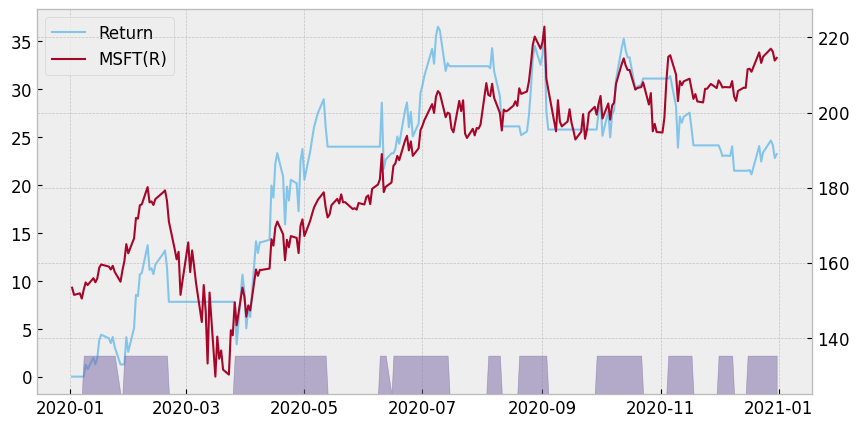

In [ ]:
# 트레이딩 성과 산출
fs.evaluate(df, cost= .001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# MACD 전략 코드 분석 : 모멘텀 전략(상승세의 주식을 구매하여 주식이 오르길 기대하는 전략)   평균회귀전략(원래 수준보다 하락한 주가의 종목을 사서 회복하길 기다리는 전략)
def macd(df, short=12, long=26, signal=9):
symbol = df.columns[0]
df['ema_short'] = df[symbol].ewm(span=short).mean() # 단기(12) EMA
df['ema_long'] = df[symbol].ewm(span=long).mean() # 장기(26) EMA
df['macd'] = (df['ema_short']- df['ema_long']).round(2) # 단기 EMA에서 장기 EMA를 뺀 값
df['macd_signal'] = df['macd'].ewm(span=signal).mean().round(2) # 9일 지수 이동 평균
df['macd_oscillator'] = (df['macd'] - df['macd_signal']).round(2) # MACD 오실레이터 계산 : MACD와 시그널선의 차이를 계산
return df[[symbol, 'macd', 'macd_signal', 'macd_oscillator']] # MACD,MACD Signal, MACD Oscillator의 3가지 지표를 포함한 데이터프레임을 반환

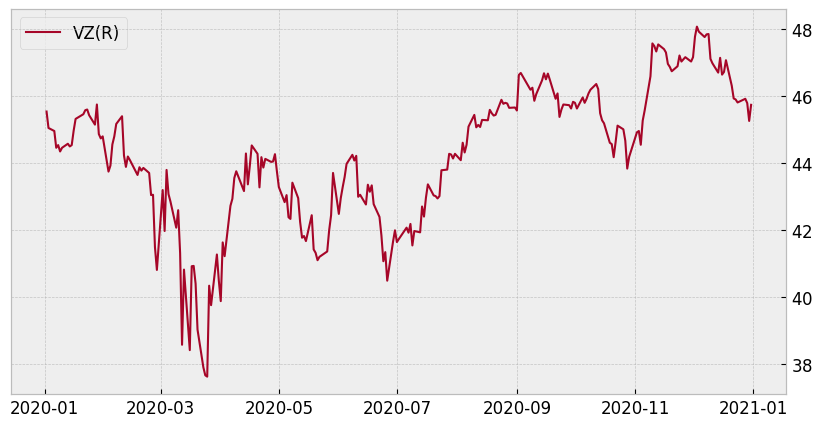

In [ ]:
# 백테스트 -> 미국 통신기업 버라이즌(VZ)의 주가 가져오기
!pip install finterstellar
import finterstellar as fs
symbol = 'VZ'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

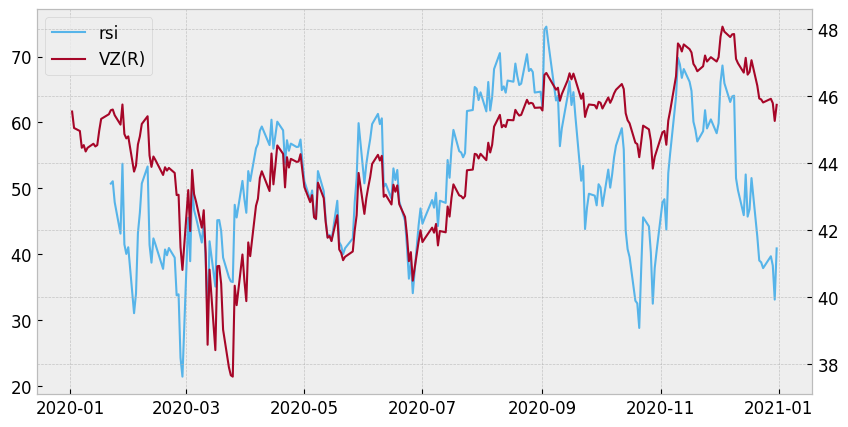

In [ ]:
# RSI값을 구하기 위하여 주가의 데이터프레임을 시각화
fs.rsi(df, w=14)
fs.draw_chart(df, left='rsi', right=symbol)

CAGR: 14.06%
Accumulated return: 13.25%
Average return: 9.39%
Benchmark return : 0.35%
Number of trades: 2
Number of win: 1
Hit ratio: 50.00%
Investment period: 0.9yrs
Sharpe ratio: 0.46
MDD: -14.07%
Benchmark MDD: -17.73%


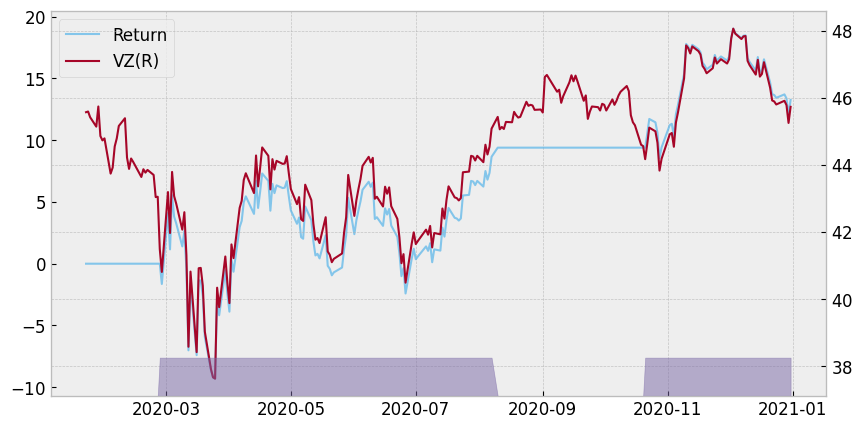

In [ ]:
# 와일더의 전략(RSI가 70 이상이면 매수, 30 이하이면 매도)
fs.indicator_to_signal(df, factor='rsi', buy=30, sell=70)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: -0.24%
Accumulated return: -0.23%
Average return: -0.23%
Benchmark return : 0.35%
Number of trades: 1
Number of win: 0
Hit ratio: 0.00%
Investment period: 0.9yrs
Sharpe ratio: -0.26
MDD: -2.90%
Benchmark MDD: -17.73%


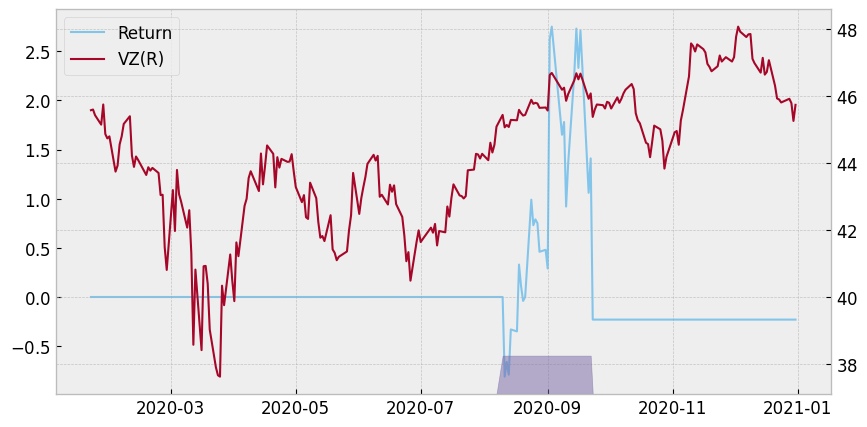

In [ ]:
# 동일한 종목(버라이즌(VZ))을 모멘텀 전략으로 거래하는 경우
fs.indicator_to_signal(df, factor='rsi', buy=70, sell=50)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# RSI를 구하는 코드
def rsi(df, w= 14):
  symbol = df.columns[0]
  df.fillna(method='ffill', inplace=True) # 들어온 데이터의 구멍을 메꿔준다
  if len(df) > w:
    df['diff'] = df.iloc[:,0].diff() # 일별 가격차이 계산
    df['au'] = df['diff'].where(df['diff']>0, 0).rolling(w).mean()
    df['ad'] = df['diff'].where(df['diff']<0, 0).rolling(w).mean().abs()
    for r in range(w+1, len(df)):
      df['au'][r] = ( df['au'][r-1]*(w-1) +
df['diff'].where(df['diff']>0,0)[r] ) / w
      df['ad'][r] = ( df['ad'][r-1]*(w-1) +
df['diff'].where(df['diff']<0,0).abs()[r]) / w
      df['rsi'] = (df['au'] / df['au']+df['ad'] * 100).round(2)
      return df[[symbol, 'rsi']]
    else:
      return None

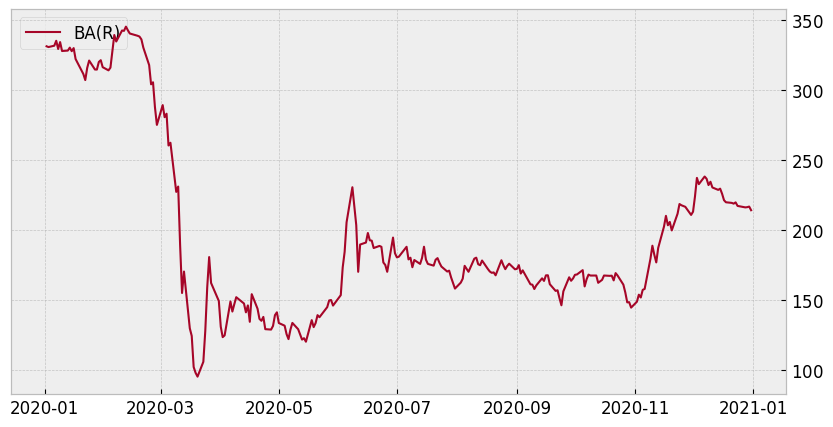

In [ ]:
# 모멘텀 전략의 백테스트 : 보잉의 과서 시세 불러오기.
!pip install finterstellar
import finterstellar as fs
symbol = 'BA'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [ ]:
# 엔벨로프값(차트상의 현재 가격이 그래프의 어느 영역에 있는지 확인) : w는 이동평균 사용 기간, spread는 영역의 사이즈(10% 영역)
# center는 평균값, ub는 상단값, lb는 하단값
fs.envelope(df, w=20, spread=.1)
df.tail()

,BA,center,ub,lb
2020-12-24,217.15,225.27,247.80,202.75
2020-12-28,216.09,225.25,247.78,202.73
2020-12-29,216.25,225.53,248.08,202.98
2020-12-30,216.67,225.71,248.28,203.14
2020-12-31,214.06,225.22,247.74,202.70


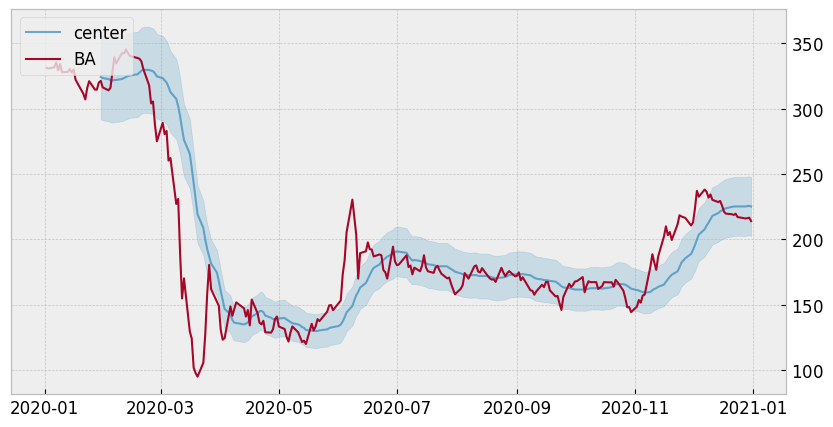

In [ ]:
# 밴드를 그리는 그래프 시각화
fs.draw_band_chart(df)

In [ ]:
# 트레이딩 시그널 만들기 - 모멘텀 전략
fs.band_to_signal(df, buy='A', sell='B')

,trade
2020-01-02,zero
2020-01-03,zero
2020-01-06,zero
2020-01-07,zero
2020-01-08,zero
...,...
2020-12-24,zero
2020-12-28,zero
2020-12-29,zero
2020-12-30,zero


CAGR: 38.38%
Accumulated return: 35.33%
Average return: 5.58%
Benchmark return : -33.40%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: 0.88
MDD: -26.49%
Benchmark MDD: -72.49%


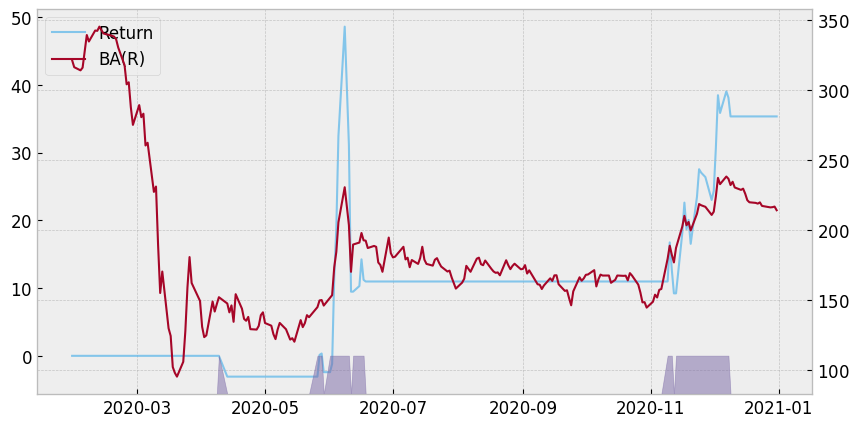

In [ ]:
# 모멘텀 전략의 투자 결과를 백테스트
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: -22.11%
Accumulated return: -20.35%
Average return: -0.36%
Benchmark return : -33.40%
Number of trades: 4
Number of win: 3
Hit ratio: 75.00%
Investment period: 0.9yrs
Sharpe ratio: -0.27
MDD: -67.16%
Benchmark MDD: -72.49%


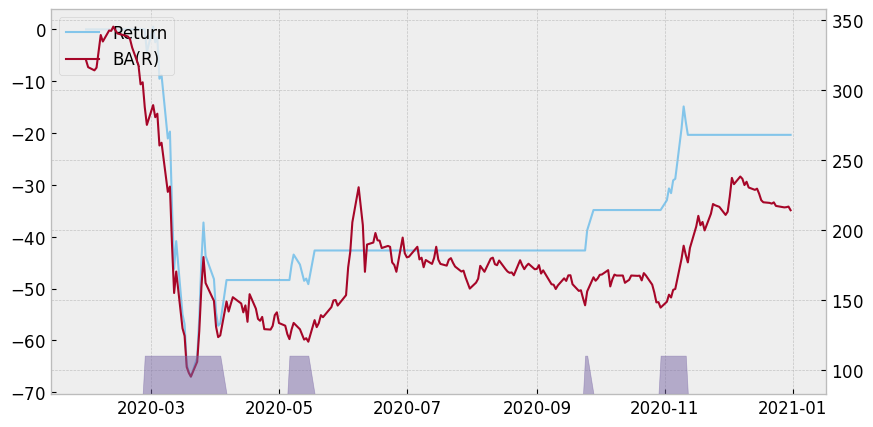

In [ ]:
# 평균회귀전략의 결과를 백테스트
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# envelope 함수의 이해
def envelope(df, w=50, spread=.05):
  symbol = df.columns[0]
  df['center'] = df[symbol].rolling(w).mean() # 지수이동평균으로 바꿀 경우 : df['center'] = df[symbol].ewm(span=w, adjust=False).mean()
  df['ub'] = df['center']*(1+spread)
  df['lb'] = df['center']*(1-spread)
  return df[[symbol, 'center', 'ub', 'lb']]

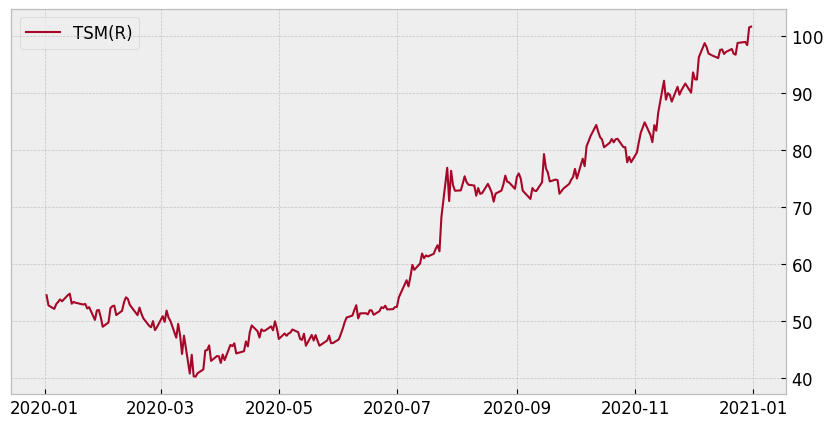

In [ ]:
# 볼린저밴드에 따른 모멘텀 전략 벡테스트를 위한 TSMC 주가 가져오기 : 종목은 TSMC(TSM),  기본 밴드 세팅인 BB(20,2)로 상승 구간 공략
symbol = 'TSM'
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.draw_chart(df, right=symbol)

In [ ]:
# 볼린저 함수를 이용하여 볼린저밴드의 center,ub,lb를 계산
fs.bollinger(df, w=20, k=2)
df.tail()

,TSM,center,sigma,ub,lb
2020-12-24,98.76,95.92,2.50,100.93,90.92
2020-12-28,98.93,96.29,2.37,101.03,91.55
2020-12-29,98.38,96.71,1.90,100.51,92.90
2020-12-30,101.49,97.10,2.04,101.17,93.03
2020-12-31,101.62,97.56,1.96,101.47,93.65


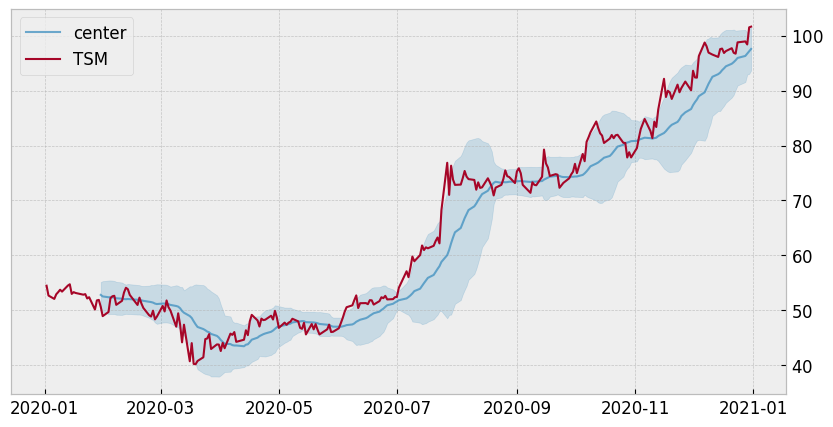

In [ ]:
# 차트 시각화
fs.draw_band_chart(df)

CAGR: 9.16%
Accumulated return: 8.43%
Average return: 0.86%
Benchmark return : 100.59%
Number of trades: 11
Number of win: 5
Hit ratio: 45.45%
Investment period: 0.9yrs
Sharpe ratio: 0.32
MDD: -13.75%
Benchmark MDD: -26.55%


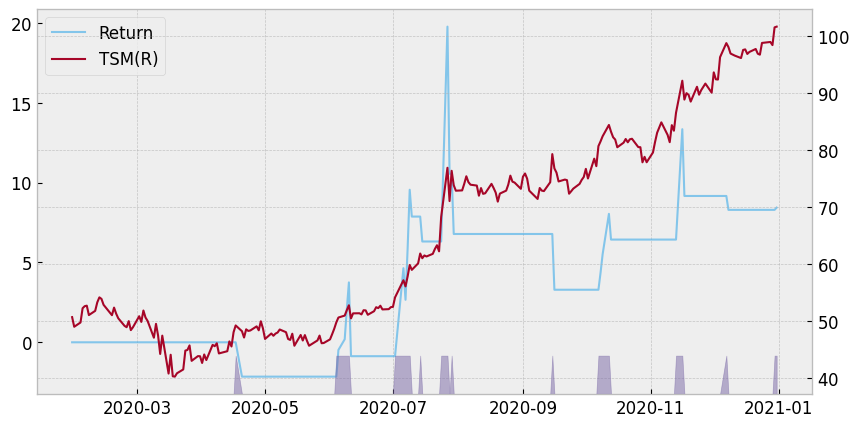

In [ ]:
# 트레이딩 시그널 산출부터 시작하는 백테스트 실행
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df,rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: 16.54%
Accumulated return: 15.23%
Average return: 4.85%
Benchmark return : 100.59%
Number of trades: 3
Number of win: 3
Hit ratio: 100.00%
Investment period: 0.9yrs
Sharpe ratio: 0.50
MDD: -15.17%
Benchmark MDD: -25.70%


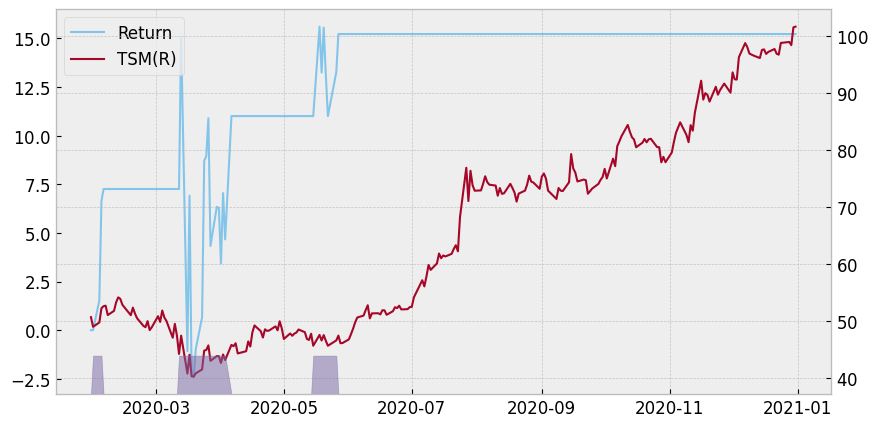

In [ ]:
# 평균회귀 전략 백테스트
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

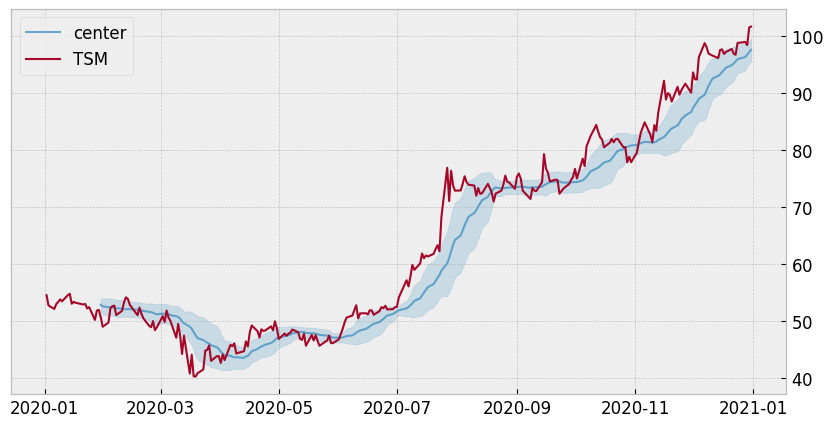

In [ ]:
# 볼린저밴드 산출을 BB(20,2) -> BB(20,1)로 바꿔서 실행
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.bollinger(df, w=20, k=1)
fs.draw_band_chart(df)

CAGR: 23.75%
Accumulated return: 21.86%
Average return: 1.28%
Benchmark return : 100.59%
Number of trades: 22
Number of win: 5
Hit ratio: 22.73%
Investment period: 0.9yrs
Sharpe ratio: 0.65
MDD: -14.16%
Benchmark MDD: -26.55%


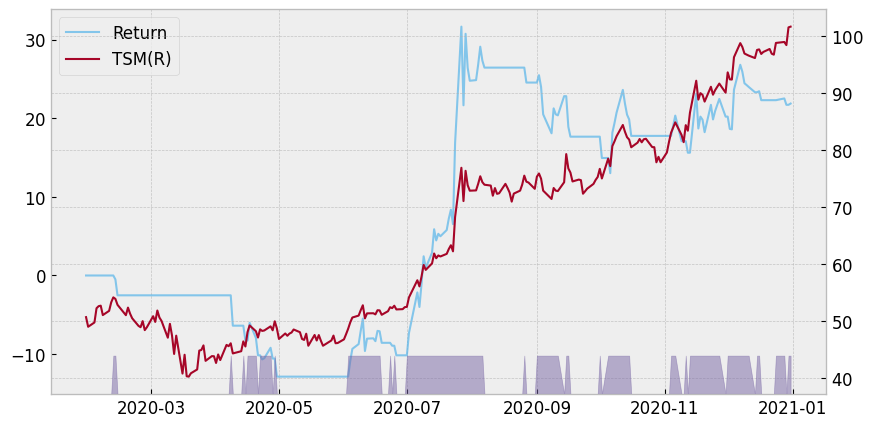

In [ ]:
# BB(20,1)일 경우의 모멘텀 백테스트
fs.band_to_signal(df, buy='A', sell='B')
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

CAGR: 23.75%
Accumulated return: 21.86%
Average return: 1.28%
Benchmark return : 100.59%
Number of trades: 8
Number of win: 5
Hit ratio: 62.50%
Investment period: 0.9yrs
Sharpe ratio: 0.65
MDD: -14.16%
Benchmark MDD: -26.55%


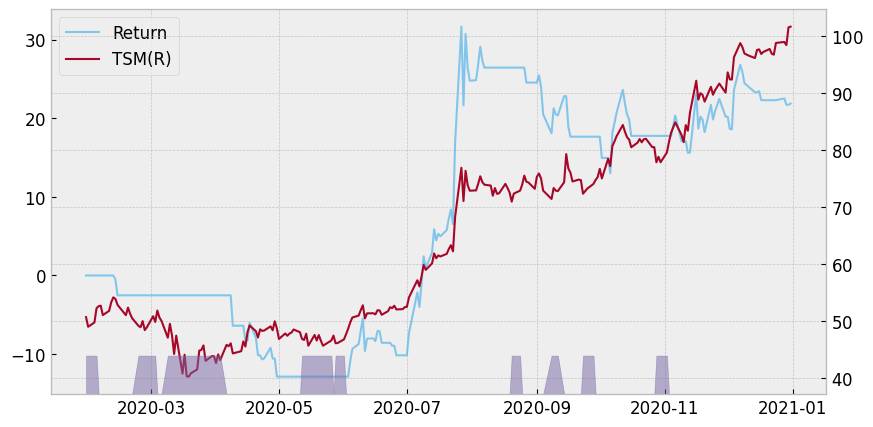

In [ ]:
# BB(20,1)일 경우의 평균회귀 백테스트
fs.band_to_signal(df, buy='D', sell='B')
fs.position(df)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 모멘텀+평균회귀로 새로운 시그널을 생성
df = fs.get_price(symbol, start_date='2020-01-01', end_date='2020-12-31')
df = fs.bollinger(df, w=20, k=1)
df['s1'] = fs.band_to_signal(df, buy='A', sell='B')
df['s2'] = fs.band_to_signal(df, buy='D', sell='B')

In [ ]:
# 시그널 합성
fs.combine_signal_or(df, 's1', 's2')

,TSM,center,ub,lb,trade,s1,s2
2020-01-02,54.50,NaN,NaN,NaN,zero,zero,zero
2020-01-03,52.71,NaN,NaN,NaN,zero,zero,zero
2020-01-06,52.10,NaN,NaN,NaN,zero,zero,zero
2020-01-07,52.94,NaN,NaN,NaN,zero,zero,zero
2020-01-08,53.33,NaN,NaN,NaN,zero,zero,zero
...,...,...,...,...,...,...,...
2020-12-24,98.76,95.92,98.43,93.42,buy,buy,zero
2020-12-28,98.93,96.29,98.66,93.92,buy,buy,zero
2020-12-29,98.38,96.71,98.61,94.81,zero,zero,zero
2020-12-30,101.49,97.10,99.14,95.07,buy,buy,zero


CAGR: 56.39%
Accumulated return: 51.91%
Average return: 1.70%
Benchmark return : 100.59%
Number of trades: 30
Number of win: 12
Hit ratio: 40.00%
Investment period: 0.9yrs
Sharpe ratio: 1.11
MDD: -19.46%
Benchmark MDD: -26.55%


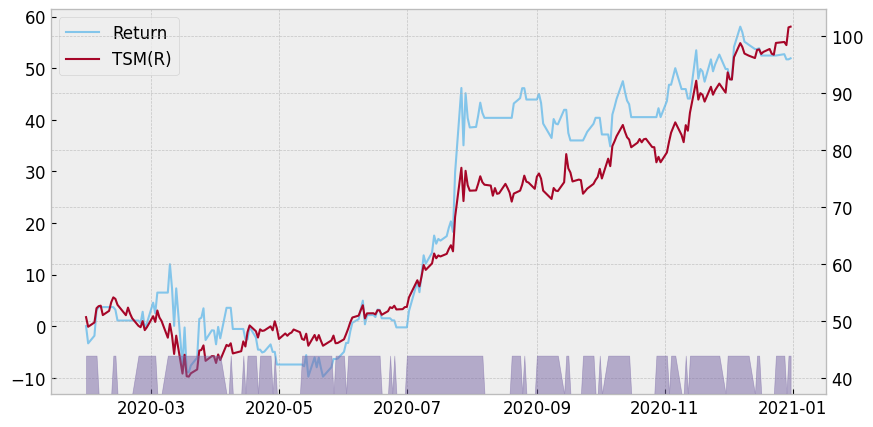

In [ ]:
# 합성된 시그널(모멘텀+평균회귀)의 백테스트
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 볼린저 밴드 산출 코드의 이해
def bollinger(df, w=20, k=2):
  symbol = df.columns[0]
  df['center'] = df[symbol].rolling(w).mean() # w일 간의 이동편균을 계산
  df['sigma'] = df[symbol].rolling(w).std() # 표준편차를 계산
  df['ub'] = df['center'] + k * df['signma'] # 6~7행은 볼린저 밴드 공식에 따라 밴드 상단값(ub)와 하한값(lb)를 계산
  df['lb'] = df['center'] - k * df['signma']
  return df[[symbol, 'center', 'ub', 'lb']]

In [ ]:
# 스토캐스틱 : 평균회귀 백테스트 -> 스토캐스틱은 시가,고가,저가,종가 데이터가 다 필요하므로 get_price() 대신 get_ohlc()를 사용
symbol = 'DAL'
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
df.tail()

,Open,High,Low,Close,Volume,Adj Close
2020-12-24,40.42,40.44,39.60,39.73,5176400,39.02
2020-12-28,40.27,40.78,40.01,40.15,10654400,39.43
2020-12-29,40.84,40.84,39.90,40.03,8142800,39.31
2020-12-30,40.00,40.91,39.89,40.56,8504600,39.84
2020-12-31,40.30,40.74,39.76,40.21,8705700,39.49


In [ ]:
# 스토캐스틱 지표 계산
fs.stochastic(df, symbol, n=14, m=3, t=3)

,DAL,slow_k,slow_d
2020-01-02,59.04,NaN,NaN
2020-01-03,58.06,NaN,NaN
2020-01-06,57.66,NaN,NaN
2020-01-07,57.61,NaN,NaN
2020-01-08,58.85,NaN,NaN
...,...,...,...
2020-12-24,39.73,17.11,18.44
2020-12-28,40.15,25.84,20.44
2020-12-29,40.03,24.35,22.43
2020-12-30,40.56,32.62,27.60


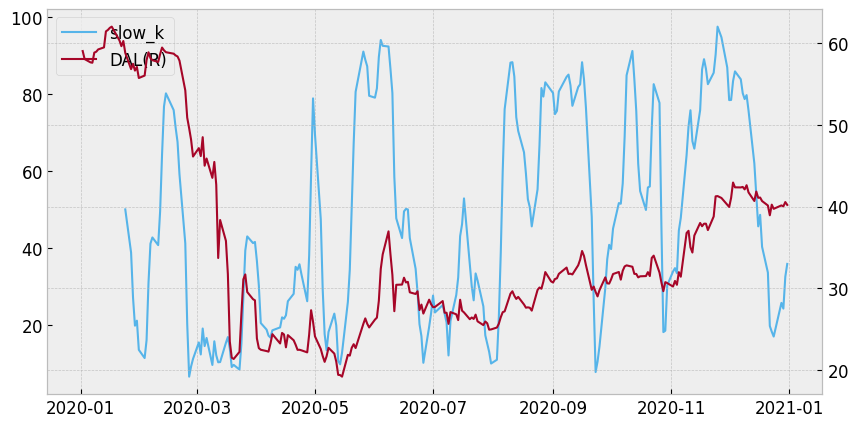

In [ ]:
# Slow K 값을 그래프로 시각화
fs.draw_chart(df, left='slow_k', right=symbol)

CAGR: -30.16%
Accumulated return: -27.93%
Average return: -1.64%
Benchmark return : -30.05%
Number of trades: 6
Number of win: 4
Hit ratio: 66.67%
Investment period: 0.9yrs
Sharpe ratio: -0.37
MDD: -61.71%
Benchmark MDD: -69.06%


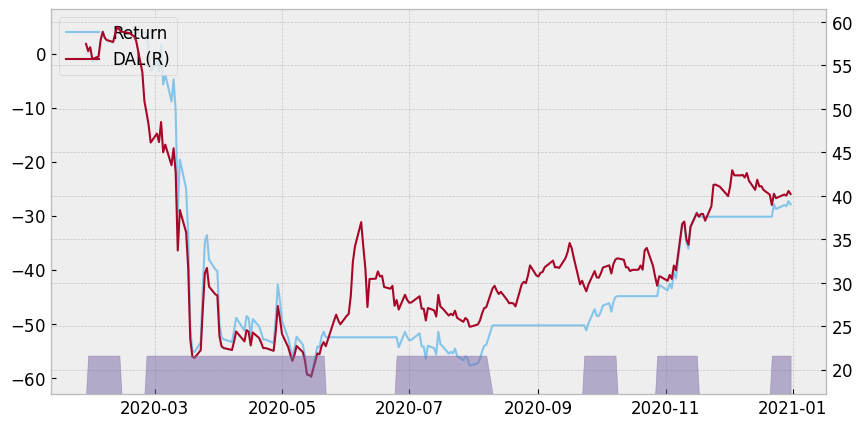

In [ ]:
# Slow K가 20보다 낮아지면 매수, 80보다 높아지면 매도하도록 트레이딩 시그널을 만들고 백테스트 실행
fs.indicator_to_signal(df, factor='slow_k', buy=20, sell=80)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 스토캐스틱 : 모멘텀 전략 -> Slow K가 Slow D보다 위에 있으면 매수하고, 반대면 매도하는 전략
df = fs.get_ohlc(symbol, start_date='2020-01-01', end_date='2020-12-31')
fs.stochastic(df, symbol, n=14, m=3, t=3)
df.tail()

,DAL,slow_k,slow_d
2020-12-24,39.73,17.11,18.44
2020-12-28,40.15,25.84,20.44
2020-12-29,40.03,24.35,22.43
2020-12-30,40.56,32.62,27.60
2020-12-31,40.21,35.93,30.97


In [ ]:
# (Slow K - Slow D) 값이 양수이면, Slow K가 위에 있는 것으로 판단
df['indicator'] = df['slow_k'] - df['slow_d']
df.tail()

,DAL,slow_k,slow_d,indicator
2020-12-24,39.73,17.11,18.44,-1.33
2020-12-28,40.15,25.84,20.44,5.40
2020-12-29,40.03,24.35,22.43,1.92
2020-12-30,40.56,32.62,27.60,5.02
2020-12-31,40.21,35.93,30.97,4.96


CAGR: -2.96%
Accumulated return: -2.74%
Average return: 0.69%
Benchmark return : -30.05%
Number of trades: 29
Number of win: 11
Hit ratio: 37.93%
Investment period: 0.9yrs
Sharpe ratio: -0.06
MDD: -53.57%
Benchmark MDD: -67.73%


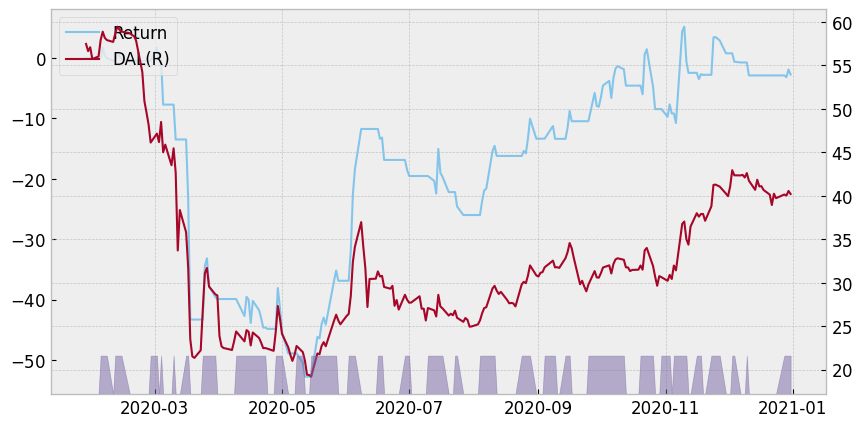

In [ ]:
# indicator값이 0보다 크면 매수, 작으면 매도하도록 트레이딩 시그널을 만들고 백테스트 진행
fs.indicator_to_signal(df, factor='indicator', buy=0, sell=0)
fs.position(df)
fs.evaluate(df, cost=.001)
fs.performance(df, rf_rate=0.01)
fs.draw_trade_results(df)

In [ ]:
# 스토캐스틱 지표 코드 분석
def stochastic(df, symbol, n=14, m=3, t=3):
    try: # 오류 처리를 위한 try ~ except~ 구문 사용, 에러가 하나라도 발생하면 except 부분을 실행
      df['fast_k'] = ( ( df['Close'] - df['Low'].rolling(n).min()) / # 스토캐스틱 값을 계산, 공식대로 계산한 해당 값을 fast-k 칼럼에 저장
  (df['High'].rolling(n).max() - df['Low'].rolling(n).min())).round(4) * 100
      df['slow_k'] = df['fast_k'].rolling(m).mean().round(2) # fast_k값으로 이동평균을 구해 slow_k를 구함
      df['slow_d'] = df['slow_k'].rolling(t).mean().round(2) # slow_k값으로 이동평균을 구해 slow_d를 구함
      df.rename(columns={'Close':symbol}, inplace=True) # 시고저종으로 들어온 종가를 종목코드로 이름을 바꿔줌
      df.drop(columns=['High','Open','Low','Volume','Adj Close','fast_k'], # 불필요한 데이터를 삭제
  inplace=True)
      return df[[symbol,'slow_k','slow_d']] # 시세, slow_k, slow_d 값을 반환
    except:
      return 'Error. The stochastic indicator requires OHLC data and symbol. Try get_ohlc() to retrieve price data.'

In [ ]:
!pip install finterstellar
import finterstellar as fs

In [ ]:
# 코스트코의 재무제표 불러오기 -> 재무제표 불러오는 함수 : fn_single(otp코드값, 종목코드, 데이터 산출 기준)
df = fs.fn_single(otp='17416124671141089711', symbol='COST', window='T')
df.tail(3)

,symbol,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,...,Financing Cash Flow,Price,Price_M1,Price_M2,Price_M3,name,name_kr,sector,industry,avg_volume
49,COST,2023Q2,235442,206925,28517,20687,7830,6000,13.51,9820,...,-3890,538.38,560.67,549.28,564.96,Costco Wholesale Corp,코스트코 홀세일,Discount Stores,Discount Stores,1723200
50,COST,2023Q3,242290,212586,29704,21590,8114,6292,14.18,10191,...,-2614,564.96,552.44,592.74,660.08,Costco Wholesale Corp,코스트코 홀세일,Discount Stores,Discount Stores,2302870
51,COST,2023Q4,245652,215274,30378,22031,8347,6517,14.69,10478,...,-2725,660.08,694.88,743.89,732.63,Costco Wholesale Corp,코스트코 홀세일,Discount Stores,Discount Stores,1789270


In [ ]:
# 칼럼값 추출
df.columns

Index(['symbol', 'term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A',
       'Operating Income', 'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares',
       'Cash & Equivalents', 'Receivables', 'Inventory', 'Current Assets',
       'Long Term Assets', 'Total Assets', 'Current Debt',
       'Current Liabilities', 'Long Term Debt', 'Long Term Liabilities',
       'Total Liabilities', 'Shareholders Equity', 'Depreciation',
       'Operating Cash Flow', 'Capital Expenditure', 'Investing Cash Flow',
       'Dividend', 'Financing Cash Flow', 'Price', 'Price_M1', 'Price_M2',
       'Price_M3', 'name', 'name_kr', 'sector', 'industry', 'avg_volume'],
      dtype='object')

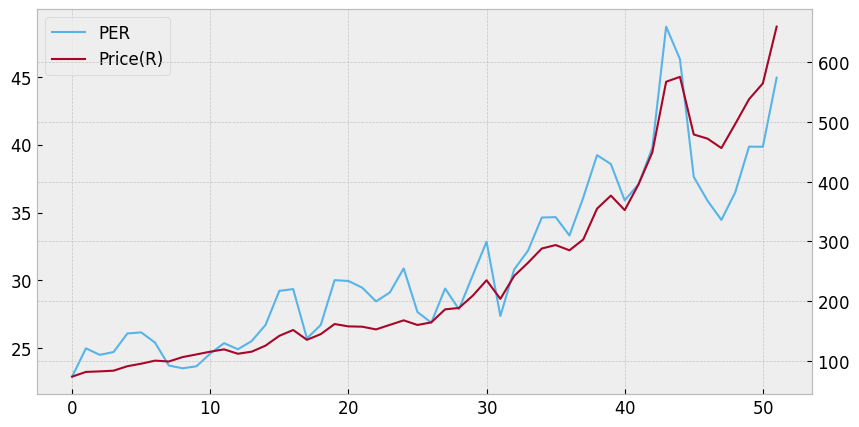

In [ ]:
# PER 추이 시각화 : Price와 EPS를 사용
df['PER'] = df['Price'] / df['EPS']
fs.draw_chart(df, left='PER', right='Price')

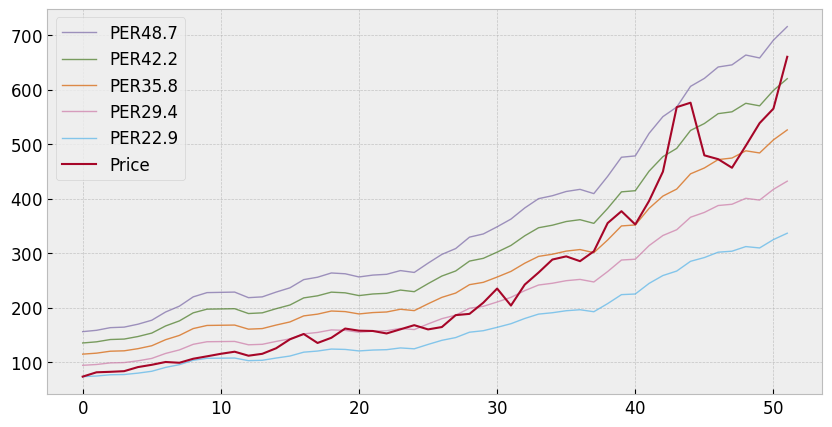

In [ ]:
# 프라이스멀티플을 밴드차트로 시각화 : 주가 = PER * EPS를 그래프로 그리기
fs.draw_price_multiple_band(df, multiple='PER', acct='EPS')

In [ ]:
# 가치주 : PER이 낮은 이익 대비 저평가된 종목 -> 지표 구하고 백테스트
# 미국 시장 전체 종목의 2020년 3분기 재무 데이터 조회 : fn_consolidated(otp, 분기 값, 일평균 거래량(기본값이 10만주))
df = fs.fn_consolidated(otp='17416124671141089711', term='2020Q3', vol=100000, study='N')
df.head(3)

2020Q3...OK


,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,Financing Cash Flow,Price,Price_M1,Price_M2,Price_M3,name,name_kr,sector,industry,avg_volume
symbol,,,,,,,,,,,,,,,,,,,,,
A,2020Q3,"5,223.00","2,437.00","2,786.00","1,494.00",797.00,691.00,2.26,"1,105.00",797.00,...,49.00,100.94,102.09,116.90,118.49,Agilent Technologies Inc,애질런트 테크놀로지스,Diagnostics & Research,Diagnostics & Research,1955500
AA,2020Q3,"9,330.00","8,043.00","1,287.00",213.00,-23.00,-469.00,-2.53,643.00,-23.00,...,484.00,11.63,12.92,19.90,23.05,Alcoa Corp,알코아,Aluminum,Aluminum,8029300
AAL,2020Q3,"24,623.00","24,753.00",-130.00,"1,348.00","-7,177.00","-6,293.00",-13.85,"-7,177.00","-7,177.00",...,"8,453.00",12.29,11.28,14.13,15.77,American Airlines Group Inc,아메리칸 에어라인스 그룹,Airlines,Airlines,60073100


In [ ]:
df.columns

Index(['term', 'Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Inventory', 'Current Assets', 'Long Term Assets',
       'Total Assets', 'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing Cash Flow', 'Dividend', 'Financing Cash Flow', 'Price',
       'Price_M1', 'Price_M2', 'Price_M3', 'name', 'name_kr', 'sector',
       'industry', 'avg_volume'],
      dtype='object')

In [ ]:
# 분기 말 주가를 기준으로 PER 계산
df['PER'] = df['Price'] / df['EPS']
df['PER']

,PER
symbol,
A,44.66
AA,-4.60
AAL,-0.89
AAOI,-2.88
AAON,40.71
...,...
ZUMZ,11.40
ZUO,-14.99
ZWS,22.78


In [ ]:
# 거래기간에 이용될 재무 데이터 산출 기준 기간 : set_terms(trade_start, trade_end)
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
terms

Index(['2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'], dtype='object')

In [ ]:
# 분기별 재무 데이터 받아오기
data_2019Q4 = fs.fn_consolidated(otp='17416124671141089711', term='2019Q4')
data_2020Q1 = fs.fn_consolidated(otp='17416124671141089711', term='2020Q1')
data_2020Q2 = fs.fn_consolidated(otp='17416124671141089711', term='2020Q2')
data_2020Q3 = fs.fn_consolidated(otp='17416124671141089711', term='2020Q3')
data_2020Q4 = fs.fn_consolidated(otp='17416124671141089711', term='2020Q4')

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
# for 순환문과 딕셔너리를 사용하여 데이터프레임 쌓기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='17416124671141089711', term=t)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [ ]:
# 2020년 3분기 데이터
print(data['2020Q3'])

          term   Revenue      COGS  Gross Profit     SG&A  Operating Income  \
symbol                                                                        
A       2020Q3  5,223.00  2,437.00      2,786.00 1,494.00            797.00   
AA      2020Q3  9,330.00  8,043.00      1,287.00   213.00            -23.00   
AAL     2020Q3 24,623.00 24,753.00       -130.00 1,348.00         -7,177.00   
AAOI    2020Q3    230.96    180.35         50.60    55.17            -47.73   
AAON    2020Q3    520.42    362.12        158.31    58.98             99.32   
...        ...       ...       ...           ...      ...               ...   
ZUMZ    2020Q3    980.94    643.45        337.49   259.06             78.43   
ZUO     2020Q3    291.10    133.82        157.28   164.34            -82.66   
ZWS     2020Q3  1,981.40  1,203.20        778.20   318.10            718.10   
ZYME    2020Q3     25.15    176.52       -151.37    72.31           -223.68   
ZYXI    2020Q3     68.68     14.58         54.10    

In [ ]:
# for 순환문을 사용하여 PER값 계산
for t in terms:
  data[t]['PER'] = data[t]['Price'] / data[t]['EPS']

In [ ]:
# PER을 기준으로 트레이딩 종목 선정
# 트레이딩 대상 종목 선정 : fn_filter(분기별 재무 데이터, 필터링 기준 항목명, 항목의 최젓값, 최댓값, 상위 종목의 개수, 오름차순or내림차순)
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)
  signal['2019Q4']

In [ ]:
# 백테스팅 수행 : backtest(시그널, 재무데이터, 리밸런싱 일자(트레이딩 할 날짜, 1달 기준), 거래비용)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

CAGR: 52.56%
Accumulated return: 52.56%
Investment period: 1.0yrs
Sharpe ratio: 1.31
MDD: -14.47%


In [ ]:
pip install --upgrade fs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
# PER이 낮은 종목을 선별하여 포트폴리오를 구성하는 가치 투자 전략 백테스트
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='17416124671141089711', term=t)
s = {}
signal = {}
for t in terms:
  data[t]['PER'] = data[t]['Price'] / data[t]['EPS']
  s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=2, cost=.001)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 52.56%
Accumulated return: 52.56%
Investment period: 1.0yrs
Sharpe ratio: 1.31
MDD: -14.47%


In [ ]:
# 제트블루(JBLU)의 재무 데이터 받아오기
df = fs.fn_single(otp='17416124671141089711', symbol='JBLU', window='T')

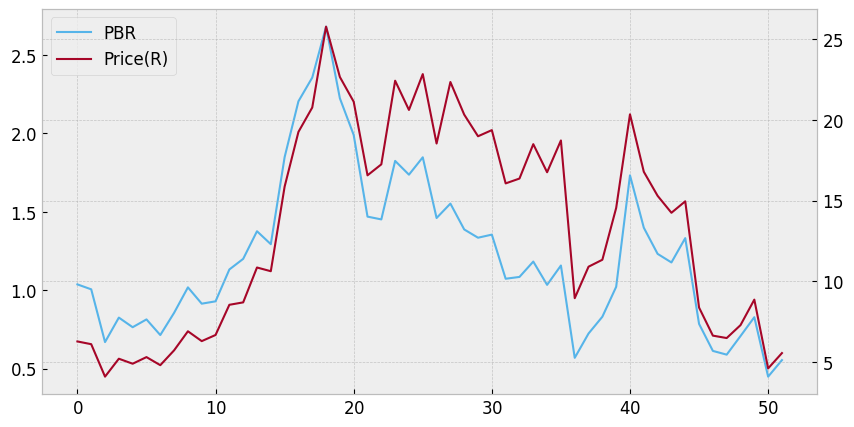

In [ ]:
# BPS(주당순자산) = 자본 / 주식수
# PBR(주가순자산비율) 계산 = 주가 / BPS(주당순자산)
df['BPS'] = df['Shareholders Equity'] / df['Shares']
df['PBR'] = df['Price'] / df['BPS']
fs.draw_chart(df, left='PBR', right='Price')

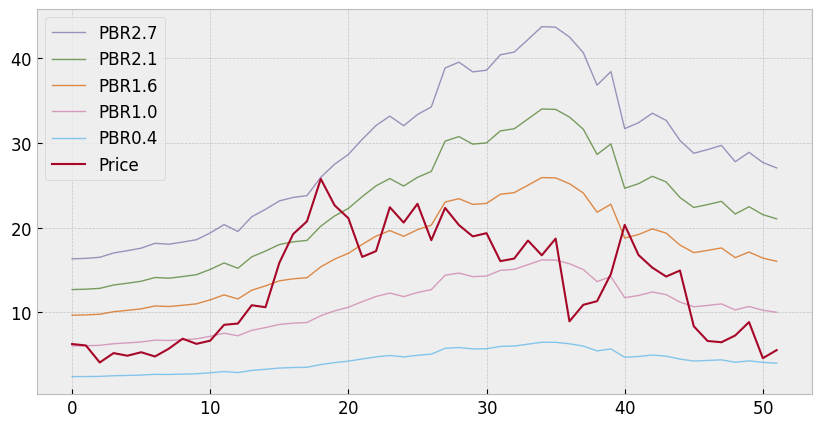

In [ ]:
# PBR밴드 시각화
fs.draw_price_multiple_band(df, multiple='PBR', acct='BPS')

In [ ]:
# PBR이 낮은 종목을 선별하여 백테스팅
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='17416124671141089711', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['BPS'] = data[t]['Shareholders Equity'] / data[t]['Shares']
    data[t]['PBR'] = data[t]['Price'] / data[t]['BPS']
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=2, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

# 2020년 3분기 보유 종목
signal['2020Q3']

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 321.19%
Accumulated return: 321.19%
Investment period: 1.0yrs
Sharpe ratio: 4.77
MDD: 0.00%


['PAGP',
 'LXU',
 'HNRG',
 'REI',
 'CRESY',
 'GNW',
 'SMHI',
 'AR',
 'NBR',
 'TUSK',
 'SMCI',
 'BHF',
 'FET',
 'GGE',
 'XYF',
 'SND',
 'YPF',
 'SALM',
 'QD',
 'NTZ',
 'MHLD',
 'NR',
 'KEP',
 'BTU',
 'MFIN',
 'HESM',
 'KLXE',
 'CEIX',
 'HLX',
 'OIS']

In [ ]:
!pip install finterstellar
import finterstellar as fs

In [ ]:
# fn_single()함수 사용 : WMT의 재무 데이터 가져오기
df = fs.fn_single(otp='17416124671141089711', symbol='WMT', window='T')

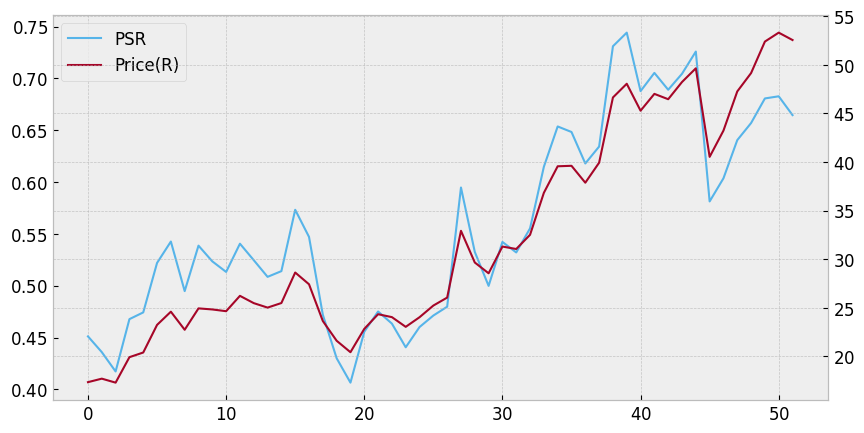

In [ ]:
# SPS(주당매출액) = 매출액 / 주식 수
# PSR = 주가 / SPS
df['SPS'] = df['Revenue'] / df['Shares']
df['PSR'] = df['Price'] / df['SPS']
fs.draw_chart(df, left='PSR', right='Price')

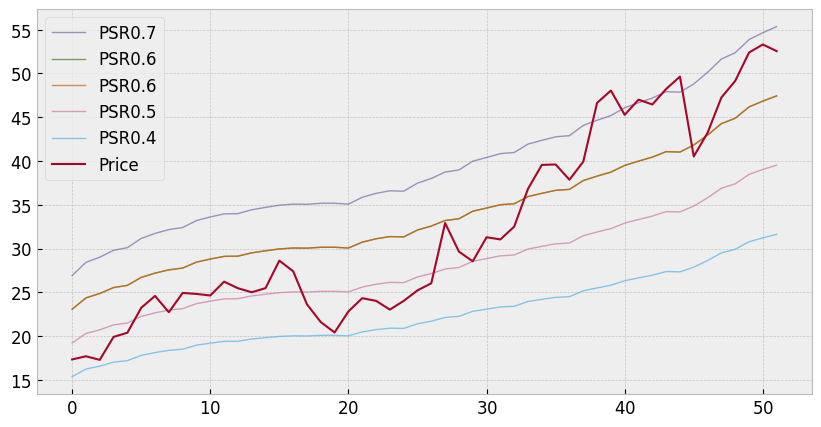

In [ ]:
# PSR 밴드 시각화 : SPS 값과 PRICE를 이용
fs.draw_price_multiple_band(df, multiple='PSR', acct='SPS')

In [ ]:
# 분기 말 기준 3개월 후의 주가를 이용해 PSR을 구하고, 리밸런싱
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='17416124671141089711', term=t)
s = {}
signal = {}
for t in terms:
  data[t]['SPS'] = data[t]['Revenue'] / data[t]['Shares']
  data[t]['PSR'] = data[t]['Price_M3'] / data[t]['SPS']
  s[t] = fs.fn_filter(data[t], by='PSR', floor=.1, cap=10, n=30, asc=True)
  signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 316.41%
Accumulated return: 316.41%
Investment period: 1.0yrs
Sharpe ratio: 6.65
MDD: 0.00%


In [ ]:
# 맥도날드의 재무 데이터 받아오기
df = fs.fn_single(otp='17416124671141089711', symbol='MCD', window='T')

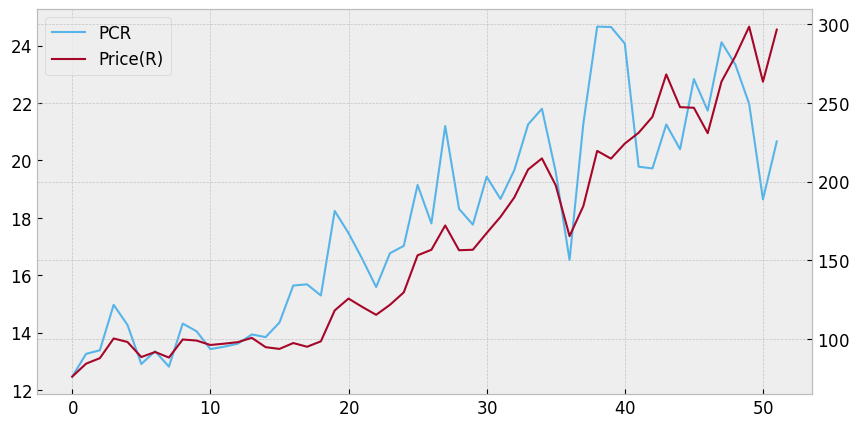

In [ ]:
# OCF(영업현금흐름) = 당기 순이익 + 감가상각비
# CFPS(주당영업현금흐름) = 영업현금흐름 / 주식 수
# PCR(주가현금흐름비율) = 주가 / 주당영업현금흐름
df['OCF'] = df['Net Income'] + df['Depreciation']
df['CFPS'] = df['OCF'] / df['Shares']
df['PCR'] = df['Price'] / df['CFPS']
fs.draw_chart(df, left='PCR', right='Price')

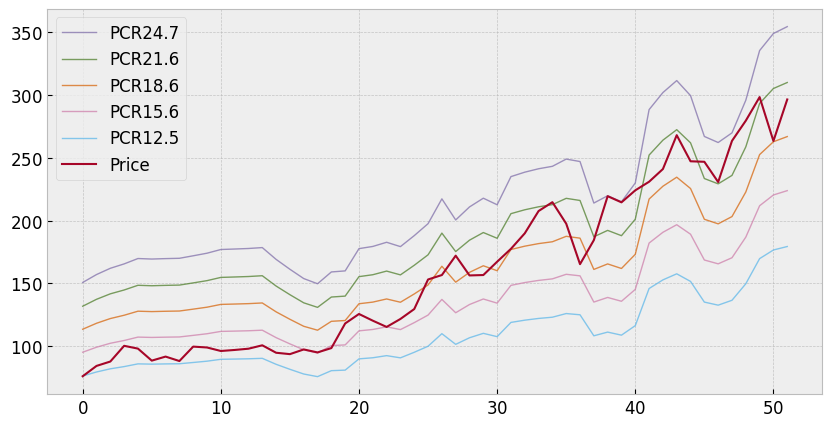

In [ ]:
# PCR 밴드 시각화
fs.draw_price_multiple_band(df, multiple='PCR', acct='CFPS')

In [ ]:
# PCR이 낮은 종목 30개에 투자 전략 백테스트(기준 주가는 분기말 기준 3개월 후 주가, 리밸런싱도 3개월 후)
terms = fs.set_terms(trade_start='2020Q1', trade_end='2021Q1')
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp='17416124671141089711', term=t)
s = {}
signal = {}
for t in terms:
  data[t]['CFPS'] = ( data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']
  data[t]['PCR'] = data[t]['Price_M3'] / data[t]['CFPS']
  s[t] = fs.fn_filter(data[t], by='PCR', floor=.1, cap=10, n=10, asc=True)
  signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 353.21%
Accumulated return: 353.21%
Investment period: 1.0yrs
Sharpe ratio: 3.14
MDD: 0.00%


In [ ]:
# 교집합 : PER과 PBR의 시그널 만들기
t = '2020Q3'
data = fs.fn_consolidated(otp='17416124671141089711', term=t, vol=0)
data['PER'] = data['Price_M3'] / data['EPS']
data['PBR'] = data['Price_M3'] / (data['Shareholders Equity']/data['Shares'])
s1 = fs.fn_filter(data, by = 'PER', floor=1, cap=10, n=10, asc=True)
s2 = fs.fn_filter(data, by = 'PBR', floor=.1, cap=1, n=10, asc=True)

2020Q3...OK


In [ ]:
# PER 종목 확인
print(s1)

        PER
symbol     
VHC    1.25
RSLS   1.26
LYFT   1.34
UIS    1.35
JOB    1.49
LBTYK  1.54
CRESY  1.55
LBTYA  1.57
MX     1.57
SND    1.58


In [ ]:
# PBR 종목 확인
print(s2)

        PBR
symbol     
REI    0.10
LTRPA  0.12
BORR   0.12
RIG    0.12
GNW    0.13
SISI   0.14
PAGP   0.14
GURE   0.15
SMCI   0.15
SMHI   0.16


In [ ]:
# PER과 PBR이 겹치는 종목을 교집합(HOW함수)
fs.combine_signal(s1,s2,how='and')

,PER,PBR
symbol,,


In [ ]:
# PER과 PBR이 겹치는 종목을 합집합
fs.combine_signal(s1,s2,how='or')

,PER,PBR
symbol,,
BORR,NaN,0.12
CRESY,1.55,NaN
GNW,NaN,0.13
GURE,NaN,0.15
JOB,1.49,NaN
LBTYA,1.57,NaN
LBTYK,1.54,NaN
LTRPA,NaN,0.12
LYFT,1.34,NaN


In [ ]:
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True)

In [ ]:
print(s1)

         PER  Score
symbol             
VHC     1.25  97.20
RSLS    1.26  97.10
LYFT    1.34  96.20
UIS     1.35  96.10
JOB     1.49  94.50
...      ...    ...
NODK    9.95   0.50
FISI    9.96   0.50
HSBC    9.97   0.40
EBTC    9.98   0.20
CRWS   10.00   0.00

[285 rows x 2 columns]


In [ ]:
print(s2)

        PBR  Score
symbol            
REI    0.10  99.60
LTRPA  0.12  98.30
BORR   0.12  97.80
RIG    0.12  97.20
GNW    0.13  97.20
...     ...    ...
FXNC   1.00   0.30
SITC   1.00   0.30
FCF    1.00   0.20
TEVA   1.00   0.20
CRS    1.00   0.10

[660 rows x 2 columns]


In [ ]:
fs.combine_score(s1,s2,n=10)

,Score,Score_,Sum
symbol,,,
CRESY,46.95,45.05,92.00
SMCI,44.80,46.95,91.75
SND,46.75,42.40,89.15
TNK,46.35,37.65,84.00
TRMD,45.00,33.20,78.20
STNG,37.20,39.60,76.80
PVL,38.00,37.20,75.20
LIVE,44.75,28.60,73.35
DTST,29.65,42.60,72.25


In [ ]:
s1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True)
s2 = fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True)

In [ ]:
print(s1)

         PER  Score
symbol             
VHC     1.25 100.00
RSLS    1.26  99.60
LYFT    1.34  99.30
UIS     1.35  98.90
JOB     1.49  98.60
...      ...    ...
NODK    9.95   1.80
FISI    9.96   1.40
HSBC    9.97   1.10
EBTC    9.98   0.70
CRWS   10.00   0.40

[285 rows x 2 columns]


In [ ]:
print(s2)

        PBR  Score
symbol            
REI    0.10 100.00
LTRPA  0.12  99.80
BORR   0.12  99.70
RIG    0.12  99.50
GNW    0.13  99.40
...     ...    ...
FXNC   1.00   0.80
SITC   1.00   0.60
FCF    1.00   0.50
TEVA   1.00   0.30
CRS    1.00   0.20

[660 rows x 2 columns]


In [ ]:
fs.combine_score(s1,s2,n=10)

,Score,Score_,Sum
symbol,,,
CRESY,48.95,48.70,97.65
SMCI,46.65,49.40,96.05
SND,48.40,47.60,96.00
TNK,47.70,46.05,93.75
TRMD,46.85,43.65,90.50
STNG,42.65,46.60,89.25
PVL,43.15,45.85,89.00
DTST,39.65,47.75,87.40
JOB,49.30,37.95,87.25
